## LAB 1 - MLP for regression

- The dataset used here is given by Google and can be found under the files folder within sample_data.

- The data is divided into 2 files called *california_housing_train.csv* and *california_housing_test.csv* - one for training and the other for testing. Use this to form your train and test predictor and response variables.

- You need to model a feed-forward neural network which will predict the *median_house_value* given the predictors.

- You will have to perform preprocesssing steps such as remove missing data, standardization, removing correlated predictors.

- Once you have completed this come up with a model architecture with your choice of number of hidden layers, number of neurons in each layer and activation functions. Remember that this is a regression problem and your choices have to be in line with it.

- Compile and fit the model on the train data with an appropriate validation split. Make plots of the train and validation loss for visual inspection.

- Predict the results on the test data and compute the test MSE. 

**NOTE** - Your aim is to predict the *median_house_value* with MSE as low as possible.



In [2]:
# Import the necessary modules
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers
import seaborn as sns
%matplotlib inline

In [30]:
train=pd.read_csv('/content/sample_data/california_housing_train.csv')
test=pd.read_csv('/content/sample_data/california_housing_test.csv')

In [31]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [33]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [34]:
X_train=train.drop(['median_house_value','total_bedrooms','population'],axis=1)
y_train=np.log(train['median_house_value'])
X_test=test.drop(['median_house_value','total_bedrooms','population'],axis=1)
y_test=np.log(test['median_house_value'])

In [35]:
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [36]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='Adam')

In [37]:
model.fit(X_train_s,y_train,validation_split=0.2,epochs=5) 

Epoch 1/5
425/425 [==============================] - 1s 1ms/step - loss: 47.6749 - val_loss: 8.7801
Epoch 2/5
425/425 [==============================] - 1s 1ms/step - loss: 3.2201 - val_loss: 5.4053
Epoch 3/5
425/425 [==============================] - 1s 1ms/step - loss: 1.1357 - val_loss: 3.0953
Epoch 4/5
425/425 [==============================] - 1s 1ms/step - loss: 0.3867 - val_loss: 1.7843
Epoch 5/5
425/425 [==============================] - 1s 1ms/step - loss: 0.1949 - val_loss: 1.1526


In [38]:
corr_matrix=train.corr()

In [39]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


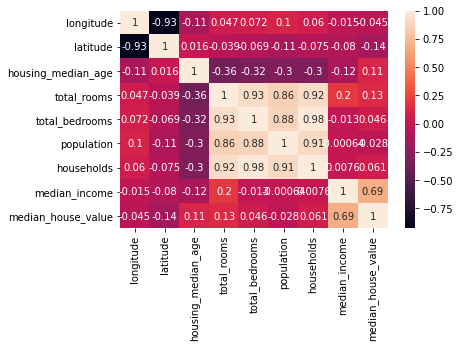

In [40]:
sns.heatmap(corr_matrix,annot=True)